In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
plt.show()
%matplotlib inline 

In [17]:
sequence = "ACTGATCGTAGCAGTAC"


In [18]:
#creating the markov chain

#################
# probabilities #
# ntnt = 56     #
# ntdel = 44    #
# delnt = 35    #
# deldel = 65   #
# initnt = 50   #
# initdel = 50  #
#################

#generates a sequence with induced misses
def markovChain(sequence):
    newSequence = ""
    for i in sequence:
        #for the very first value of the generated sequence
        if not newSequence:
            #initial sequence probability
            init_random = random.randint(1, 100)
            if init_random > 50:
                #del
                newSequence += "-"
            else:
                #write
                newSequence += i

        #for the rest of the generated values in the new sequence
        elif newSequence[-1] is "-":
            del_random = random.randint(1, 100)
            if del_random <= 35:
                #write
                newSequence += i
            else:
                #delete
                newSequence += "-"

        else:
            nt_random = random.randint(1, 100)
            if nt_random > 56:
                #deletion
                newSequence += "-"
            else:
                #write
                newSequence += i
    return newSequence


In [19]:
data = []
for i in range(10000):
    data.append(markovChain(sequence))

print(data[0:10])

    

['-CT-----TAGC---AC', '-----TCGTAGC-G---', 'AC-GAT-G----AGTAC', '-C-GAT-G--GC-G---', '---G--C-TA----T--', 'ACT----GTA-----A-', '-CTGATCGT--C--T-C', 'ACTGATCGTAG-AGT--', '-------------G---', 'A-----CG---C-GTAC']


In [20]:
def checkSum(sequence):
    sum = 0
    sumDict = {"A": 5, "G": 10, "C": 15, "T":20}
    for i in range(len(sequence)):
        if sequence[i] is not "-":
            sum += i*sumDict[sequence[i]]
    return sum

In [21]:
true_checkSum = checkSum(sequence)
print(true_checkSum)

#getting checksums of all sequences in the data list 
checkSumMarkov = list(map(checkSum, data))

#zipping together the checksums and their corresponding sequences 
zip_cs_marko = list(zip(checkSumMarkov, data))

1620


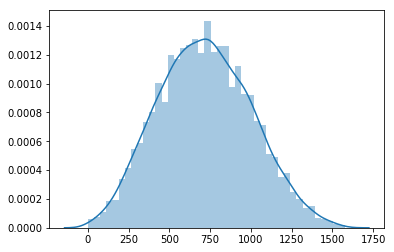

In [22]:
plt.figure()
ax = sns.distplot(checkSumMarkov)

In [23]:
#getting list of sequences with checksums within a certain range 
tight = []
for i in zip_cs_marko:
    if i[0] < 1000:
        tight.append(i)
    

In [24]:
#reconstructing from "tight" data
def reconstruct(seqList):
    reconstructed_sequence = seqList[0][1]
    for sequence in seqList:
        for i in range(len(sequence[1])):
            if (reconstructed_sequence[i] is "-") & (sequence[1][i] is not "-"):
                reconstructed_sequence = reconstructed_sequence[:i] + sequence[1][i] + reconstructed_sequence[i+1:]
    return reconstructed_sequence

In [25]:
print(reconstruct(tight))


ACTGATCGTAGCAGTAC
